# Vector Fast Fourier Transform

Here we analyze how to obtain vector focusing of a DOE with a perfect lens. 

The first result is that given by: T. G. Jabbour and S. M. Kuebler, “Vectorial beam shaping,” Opt. Express, vol. 16, no. 10, p. 7203, 2008. DOI: 10.1364/oe.16.007203 (https://www.osapublishing.org/oe/fulltext.cfm?uri=oe-16-10-7203&id=158112. In this case, the input field is linearly polarized at x.

However, the results where improved by: K. Jahn and N. Bokor, “Intensity control of the focal spot by vectorial beam shaping,” Opt. Commun., vol. 283, no. 24, pp. 4859–4865, 2010, doi: 10.1016/j.optcom.2010.07.030. In this case, the input polarization is arbitrary. The results are better

In these works there are several things to perform:

- Generation of vector propagation at focus.
- Development of examples.
- Parameters for optimization.
- Algorithms of optimization.


The incident field is an vector field (Ex, Ey, Ez) and it is propagated and converted to (Ex,Ey,Ez)

In [170]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [171]:
from matplotlib import rcParams
from matplotlib import cm

rcParams['figure.dpi'] = 300


In [172]:
from diffractio import np, sp, plt
from diffractio import nm, um, mm, degrees


In [173]:
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_sources_XY import Scalar_source_XY


In [174]:
from diffractio.vector_fields_XY import Vector_field_XY
from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY


## XY scheme

In [175]:
size = 200*um
x0 = np.linspace(-size/2, size/2, 2048)
y0 = np.linspace(-size/2, size/2, 2048)

wavelength = 0.6328 * um


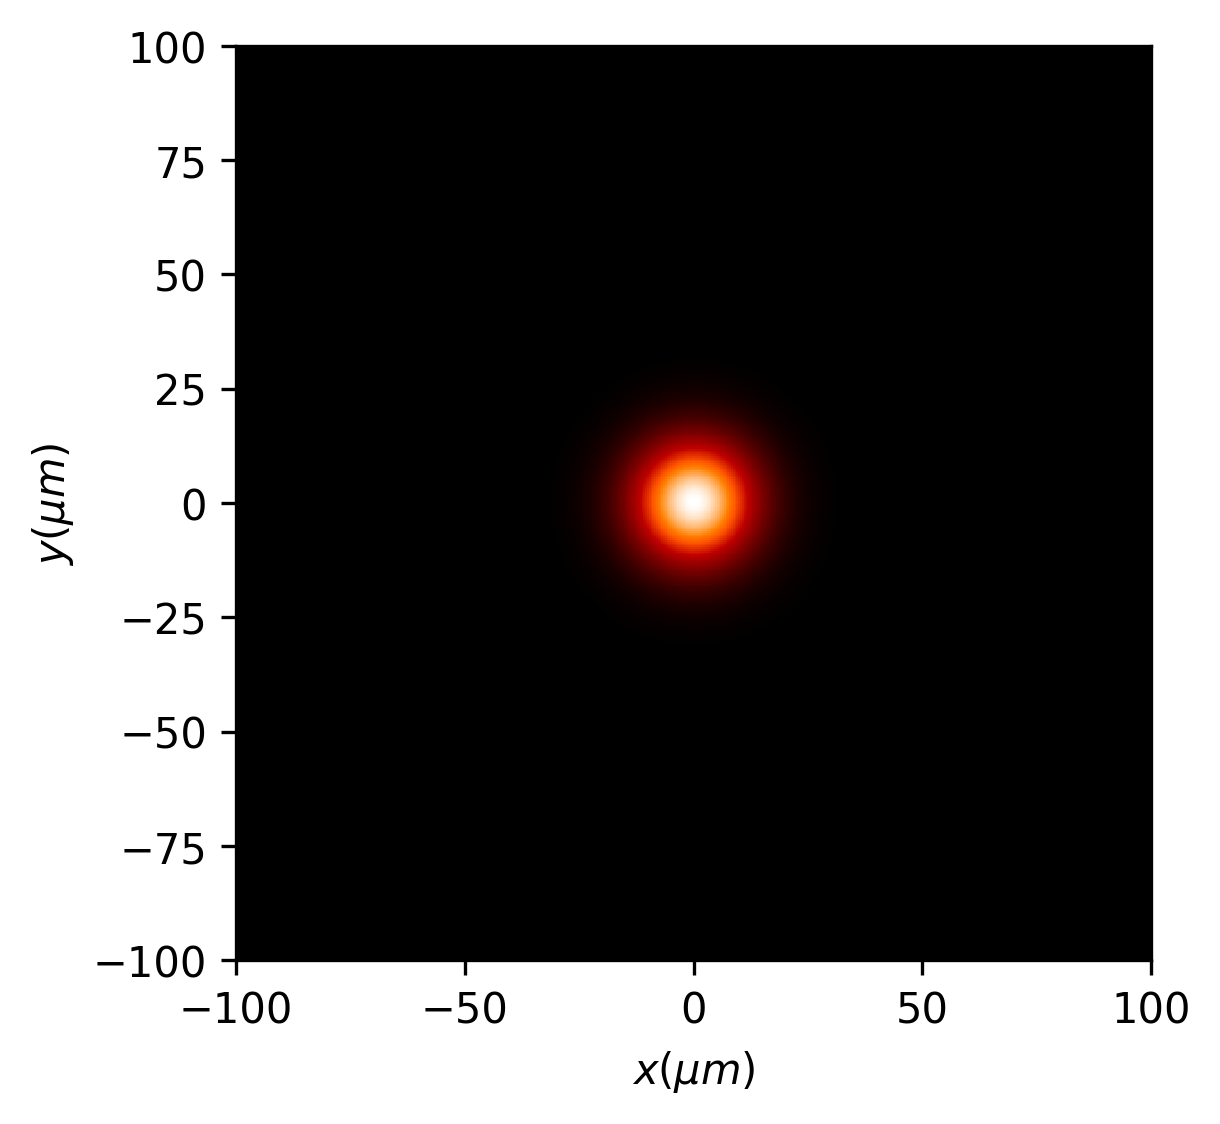

In [176]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(r0=(0, 0), w0=(20 * um, 20 * um), z0=0 * um, A=1, theta=0. * degrees, phi=0 * degrees)

u0.draw();


In [177]:
radius = 20*um
t = Scalar_mask_XY(x0, y0, wavelength)
t.circle(r0=(0, 0), radius=radius)


In [178]:
u1 = t*u0

EM1 = Vector_source_XY(x0, y0, wavelength)
EM1.constant_wave(u=u1, v=(1, 0))
# EM1.radial_wave(u=u1)


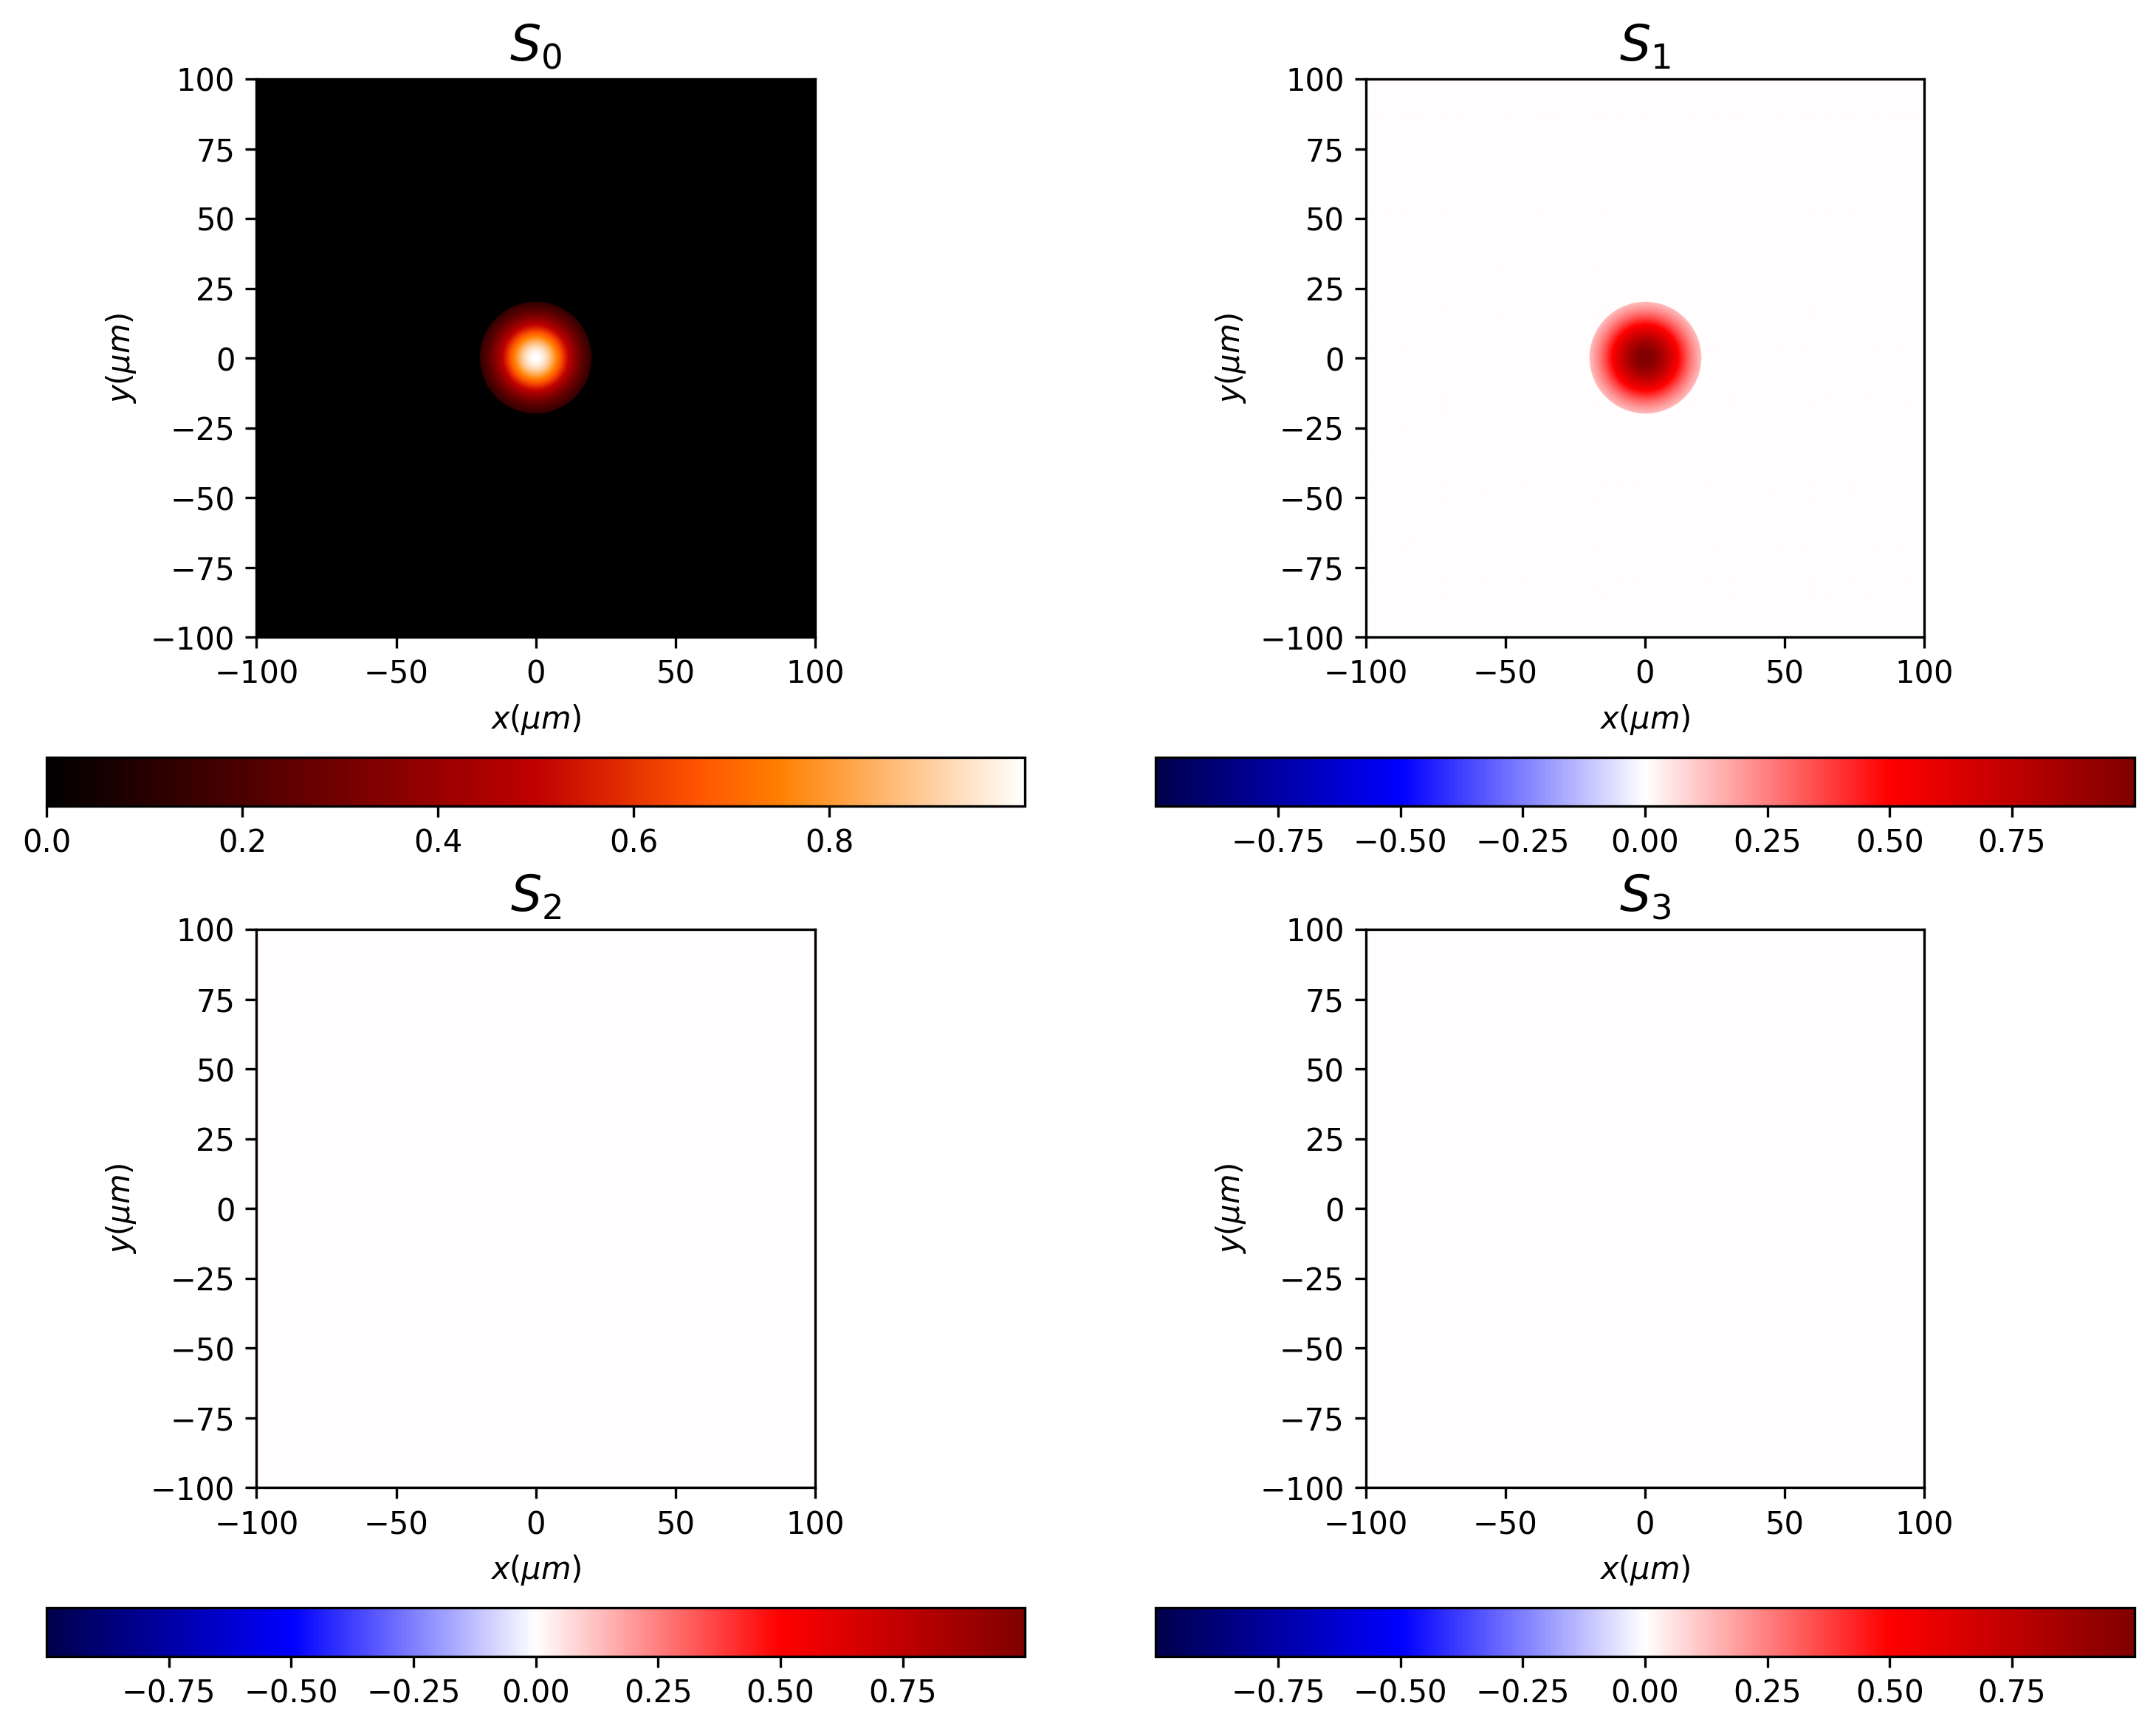

In [179]:
EM1.draw(kind='stokes');


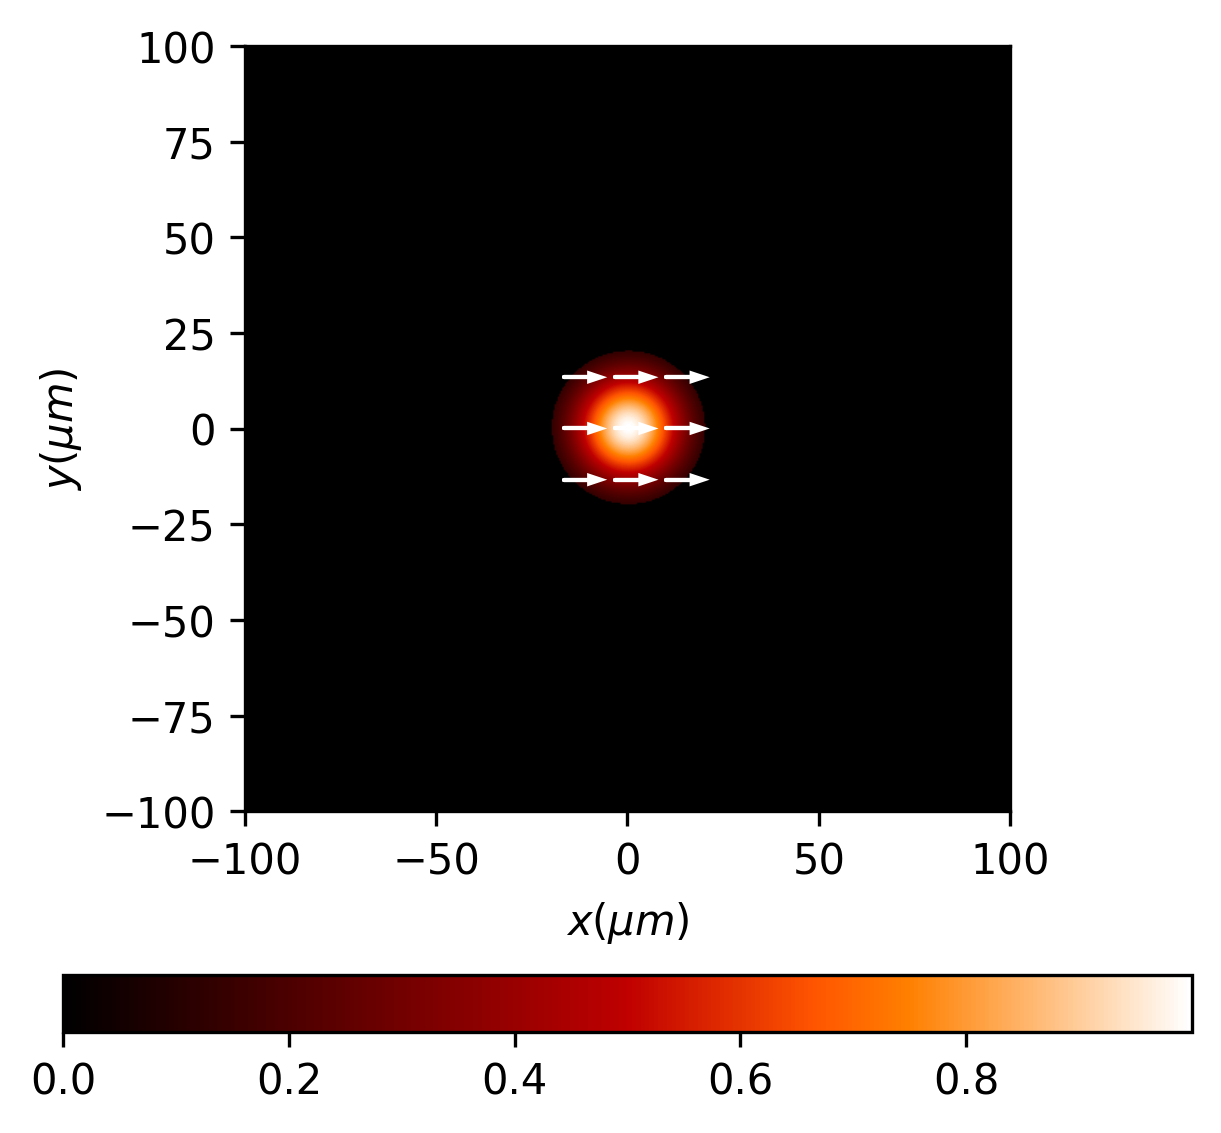

In [180]:
EM1.draw(kind='ellipses', amplification=0.5, num_ellipses=(15, 15),)


In [185]:
EM2 = EM1.VFFT(radius=16*um, focal=20*um, remove0=False, n=1, new_field=True, has_draw=False)


In [186]:
x_resample = 10
EM2.cut_resample([-x_resample, x_resample], [-x_resample, x_resample])


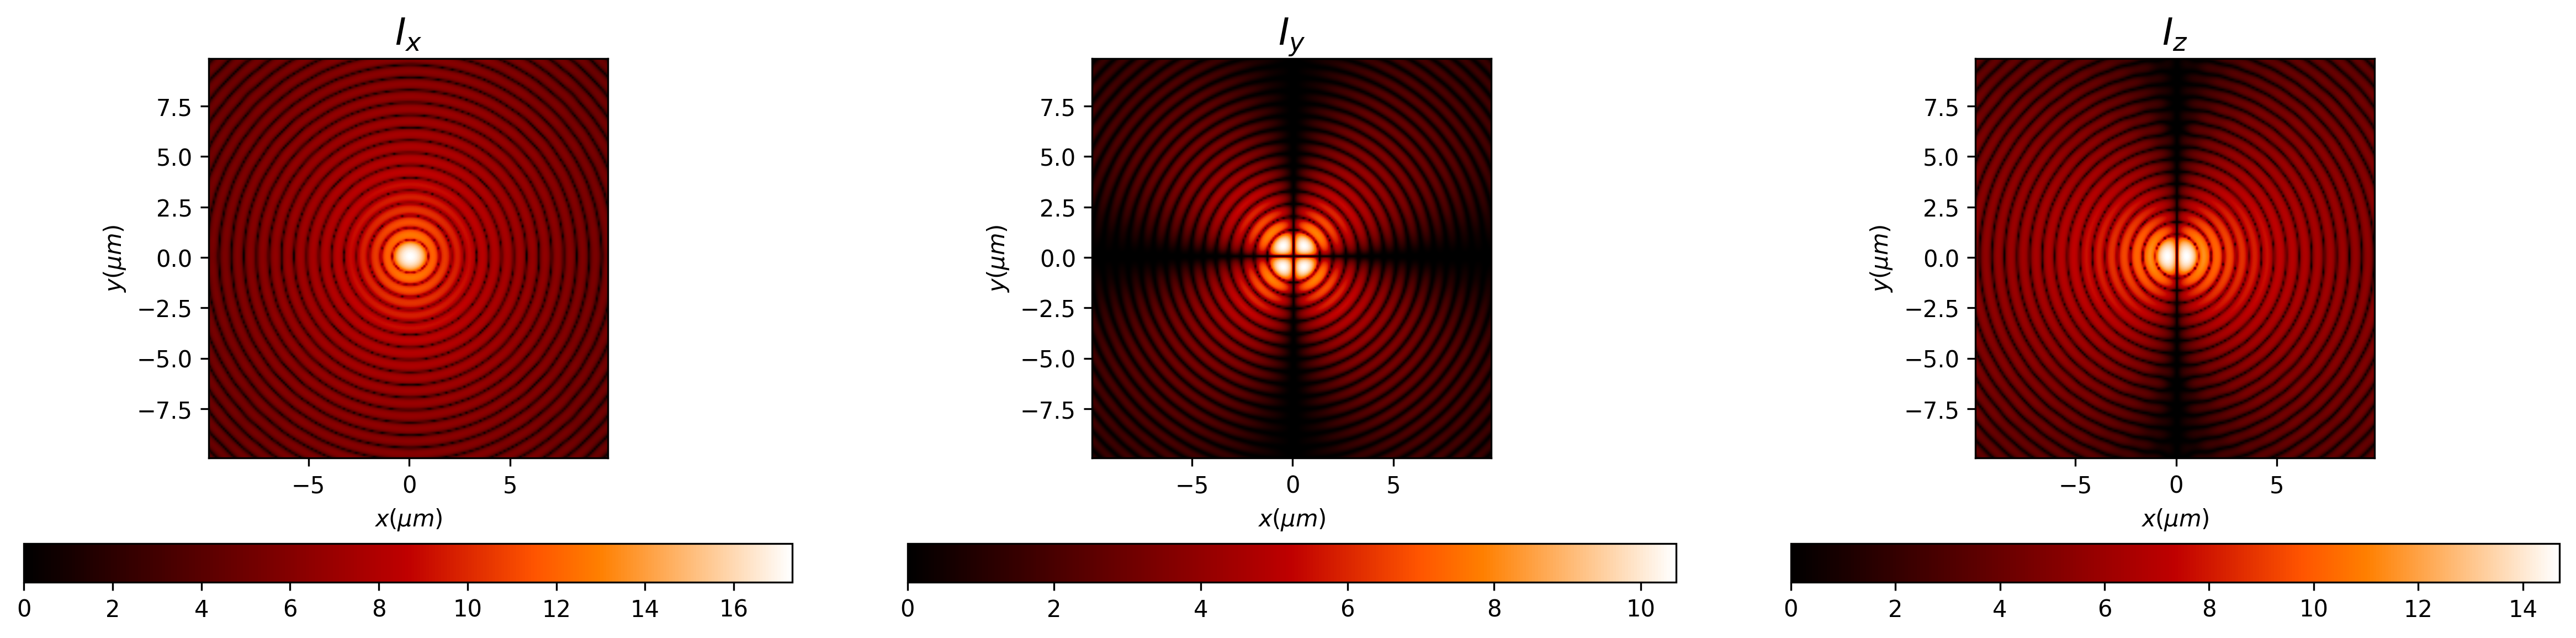

In [187]:
EM2.draw('intensities', logarithm=1e1);


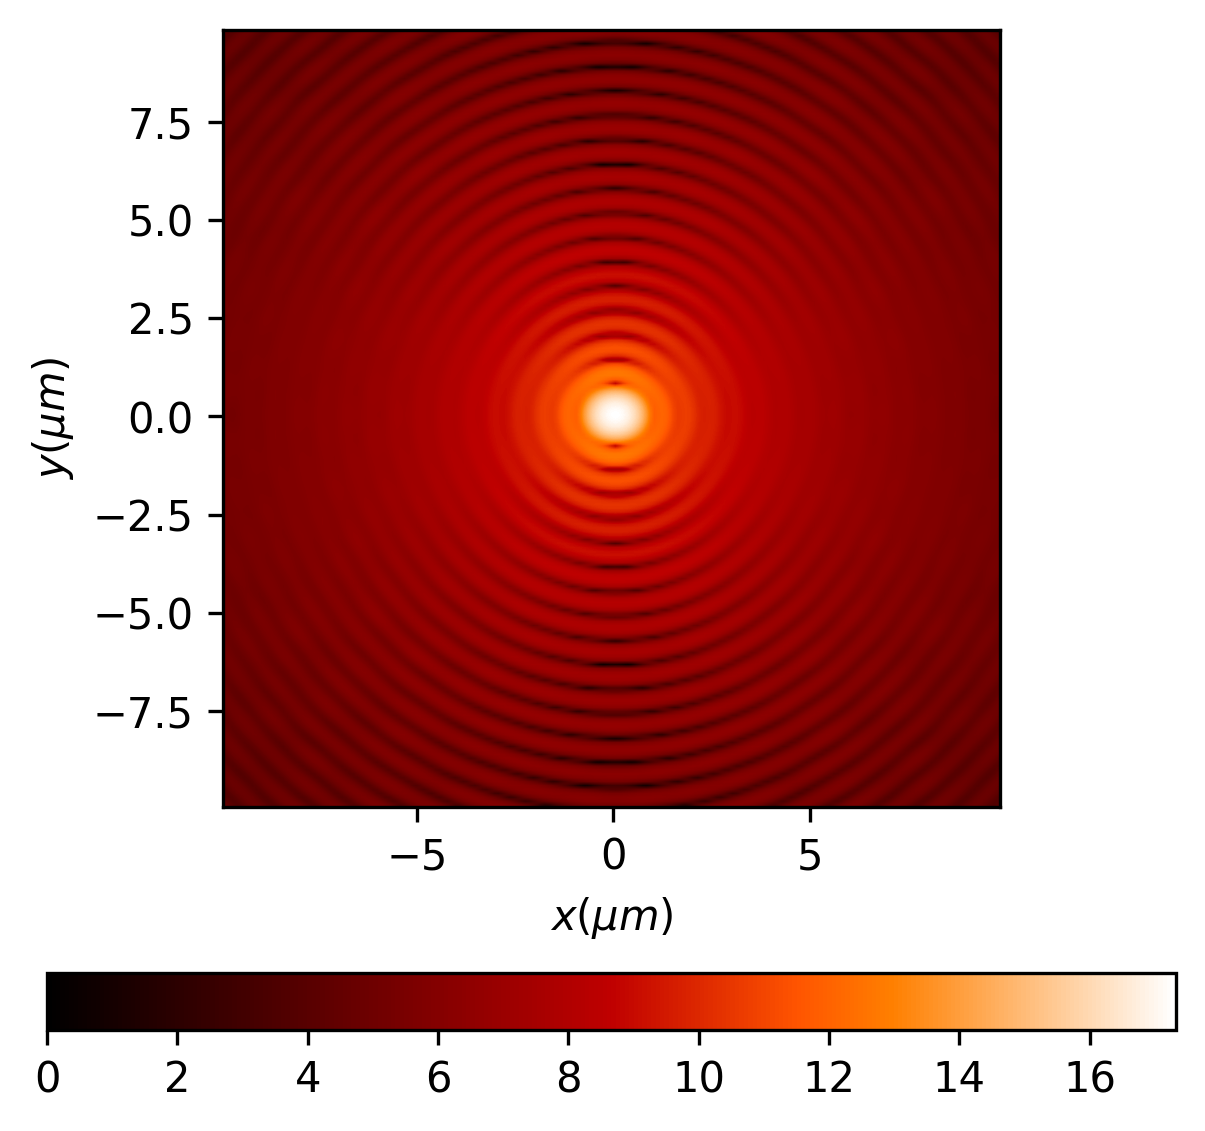

In [188]:
EM2.draw('intensity', logarithm=1e1);
